## 4: Calculating Projected Loss

There are customers who are currently behind with their loan payments. This subset of customers represent a risk to company revenue.


- What percentage do users' in this bracket currently represent as a percentage of all loans? 
- Calculate the total amount of customers in this bracket and how much loss the company would incur their status was changed to Charged Off. 
- What is the projected loss of these loans if the customer were to finish the full loans term?
- If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [1]:
import pandas as pd
import sys
sys.path.append('../')
from modules.data_transform import DataTransform
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../csv_files/imputed_loan_payments.csv')

In [3]:
transformer = DataTransform()
df = transformer.encode_transform(df)
df = transformer.cast_column_dtypes(df)

id --> int32
member_id --> int32
loan_amount --> int32
funded_amount --> float32
funded_amount_inv --> float32
term --> int32
int_rate --> float32
instalment --> float32
grade --> float32
sub_grade --> float32
employment_length --> int32
home_ownership --> category
annual_inc --> float32
verification_status --> category
issue_date --> date
loan_status --> category
payment_plan --> category
purpose --> category
dti --> float32
delinq_2yrs --> int32
earliest_credit_line --> date
inq_last_6mths --> int32
column not exist
column not exist
open_accounts --> int32
total_accounts --> int32
out_prncp --> float32
out_prncp_inv --> float32
total_payment --> float32
total_payment_inv --> float32
total_rec_prncp --> float32
total_rec_int --> float32
total_rec_late_fee --> float32
recoveries --> float32
collection_recovery_fee --> float32
last_payment_date --> date
last_payment_amount --> float32
column not exist
last_credit_pull_date --> date
collections_12_mths_ex_med --> int32
column not exist
p

In [4]:
# What percentage do users' in this bracket currently represent as a percentage of all loans?
late_payments_df = df[df['loan_status'].str.startswith('Late')]
late_payments_df 

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
17,17,17,38655869,41439673,18825,18825.0,18825.000000,60,13.660000,434.720001,...,1807.280029,0.000000,0.0,0.0,2021-10-01,434.720001,2022-01-01,0,1,INDIVIDUAL
140,140,140,38644147,41427862,15600,15600.0,15600.000000,36,14.990000,540.710022,...,1734.689941,0.000000,0.0,0.0,2021-11-01,540.710022,2022-01-01,0,1,INDIVIDUAL
168,168,168,38635317,41419102,6000,6000.0,6000.000000,36,8.670000,189.880005,...,380.269989,15.000000,0.0,0.0,2021-11-01,394.760010,2022-01-01,0,1,INDIVIDUAL
171,171,171,38635273,41419056,15000,15000.0,15000.000000,36,13.507329,471.369995,...,740.690002,0.000000,0.0,0.0,2021-09-01,471.369995,2021-09-01,0,1,INDIVIDUAL
243,243,243,38625326,41409103,5000,5000.0,5000.000000,36,11.440000,164.740005,...,457.980011,0.000000,0.0,0.0,2021-12-01,164.740005,2022-01-01,0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44095,44095,44095,635663,814313,12000,12000.0,11793.180664,60,9.620000,252.729996,...,3154.120117,0.000000,0.0,0.0,2021-12-01,252.729996,2021-11-01,0,1,INDIVIDUAL
44497,44497,44497,624521,800330,15000,15000.0,14975.000000,60,17.430000,376.269989,...,7535.399902,0.000000,0.0,0.0,2022-01-01,303.970001,2022-01-01,0,1,INDIVIDUAL
45374,45374,45374,601614,771967,18000,18000.0,17900.000000,60,15.200000,430.119995,...,7761.189941,0.000000,0.0,0.0,2021-10-01,435.459991,2022-01-01,0,1,INDIVIDUAL
45610,45610,45610,595187,764195,12000,12000.0,11950.000000,60,10.750000,259.420013,...,3572.010010,15.000000,0.0,0.0,2021-12-01,268.380005,2022-01-01,0,1,INDIVIDUAL


In [5]:
percentage_late_loans = (len(late_payments_df) / len(df)) * 100
percentage_late_loans

1.2649591562021723

In [6]:
percentage_non_late_loans = 100 - percentage_late_loans
percentage_non_late_loans

98.73504084379783

In [7]:
percentage_late_loans_df = pd.DataFrame(data = [percentage_late_loans,percentage_non_late_loans],index=['percentage late loans','percentage non-late loans'])
percentage_late_loans_df

,0
percentage late loans,1.264959
percentage non-late loans,98.735041


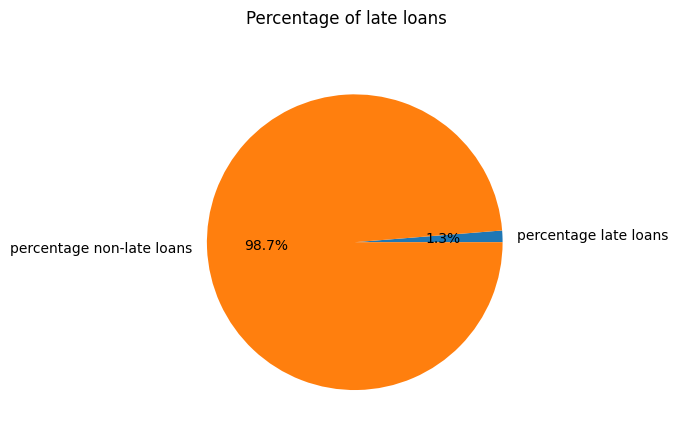

In [8]:
percentage_late_loans_df.plot(kind='pie',title='Percentage of late loans',legend=False,subplots=True, ylabel='',autopct='%1.1f%%')
plt.show()

In [9]:
# Calculate the total amount of customers in this bracket and how much loss the company would incur their status was changed to Charged Off. 
# Total amount of customers (that fall in late payments)
total_late_loans = len(late_payments_df)
print(f"Number of currently late loans: {total_late_loans}")

Number of currently late loans: 686


In [10]:
# Q. How much loss would the company incur if their status was changed to Charged Off?
potential_loss_df = late_payments_df['funded_amount_inv'] - late_payments_df['total_payment_inv']
potential_loss_sum = sum(potential_loss_df)
print('potential loss from late loans if charged off: ', potential_loss_sum)

potential loss from late loans if charged off:  3407790.0095825195


In [11]:
# Q. What is the projected loss of these loans if the customer were to finish the full loans term?
# (Come back to this)


In [12]:
# If the customers late on payments converted to Charged Off, what percentage of expected total revenue do these customers and the customers who have already defaulted on their loan represent?
df_charged_off = df[df['loan_status'] == 'Charged Off']
lost_revenue_charged_off = df_charged_off['funded_amount_inv'] - df_charged_off['total_payment_inv']
lost_revenue_charged_off_sum = sum(lost_revenue_charged_off)


total_expected_revenue_sum = potential_loss_sum + lost_revenue_charged_off_sum
print(f"Total expected revenue from charged off and late loans (if they become charged off): {total_expected_revenue_sum}")

Total expected revenue from charged off and late loans (if they become charged off): 40224823.629757926


In [13]:
total_revenue =  df['funded_amount_inv'] - df['total_payment_inv']
total_revenue_sum = sum(total_revenue)
print(f"Total revenue from payments made: {total_revenue_sum}")

Total revenue from payments made: 63107332.64526829


In [14]:
percentage_expected_revenue = (total_expected_revenue_sum / total_revenue_sum) * 100
print(f"Percentage of expected revenue from charged off and late loans (if they became charged off): {percentage_expected_revenue}") 

percentage_secured_revenue = 100 - percentage_expected_revenue 
print(f"Percentage of secured revenue: {percentage_secured_revenue}")

Percentage of expected revenue from charged off and late loans (if they became charged off): 63.740332452117876
Percentage of secured revenue: 36.259667547882124


In [15]:
percentage_expected_revenue_df = pd.DataFrame(data = [percentage_expected_revenue, percentage_secured_revenue],index=['percentage expected revenue','percentage secured revenue'])
percentage_expected_revenue_df

,0
percentage expected revenue,63.740332
percentage secured revenue,36.259668


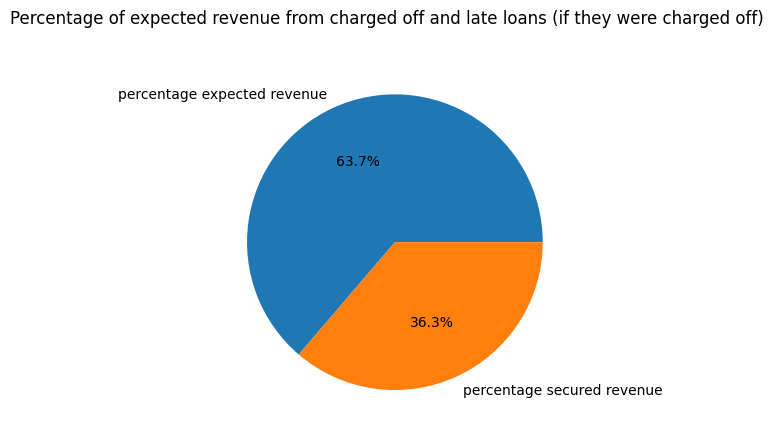

In [16]:
percentage_expected_revenue_df.plot(kind='pie',title='Percentage of expected revenue from charged off and late loans (if they were charged off)',legend=False,subplots=True, ylabel='',autopct='%1.1f%%')
plt.show()